# To build an Artificial Neural Network regression model that predicts the speed (mph) of an aircraft based on its positional data (longitude, latitude, altitude), manufacturer, model, and registration state.

### Import all the necessary libraries

In [704]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### Load the dataset

In [705]:
df = pd.read_csv('aircraft-data_nov_dec.csv')

### Learn the data

In [706]:
df.head()

,flight,tail_number,long,lat,alt,manufacturer,model,reg_expiration,reg_owner,reg_city,reg_state,squawk,mph,spotted
0,SIS300,N300NJ,-118.213,34.5823,20175,BOMBARDIER INC,BD-100-1A10,1/31/24,PUNTA PACIFICO I LLC,BAKERSFIELD,CALIFORNIA,1077.0,474,11/7/22 13:30
1,UAL1434,N67501,-117.937,34.6038,36700,BOEING,737-9,4/30/24,UNITED AIRLINES INC,CHICAGO,ILLINOIS,7730.0,523,11/7/22 13:30
2,SWA3287,N483WN,-118.035,34.6345,13225,BOEING,737-7H4,8/31/24,SOUTHWEST AIRLINES CO,DALLAS,TEXAS,4770.0,380,11/7/22 13:30
3,AAL2059,N660AW,-118.075,34.4643,33750,AIRBUS INDUSTRIE,A320-232,2/29/24,US BANK NA TRUSTEE,BOSTON,MASSACHUSETTS,1751.0,527,11/7/22 13:30
4,N84PJ,N84PJ,-117.756,34.6002,34725,DASSAULT,FALCON 2000EX,12/31/24,HAMPTON AIRWAYS INC,SELLERSBURG,INDIANA,6054.0,525,11/7/22 13:40


In [707]:
df.tail(1)

,flight,tail_number,long,lat,alt,manufacturer,model,reg_expiration,reg_owner,reg_city,reg_state,squawk,mph,spotted
30946,JBU277,N981JT,-118.042,34.6264,30350,AIRBUS,A321-231,5/31/26,JETBLUE AIRWAYS CORPORATION,LONG ISLAND CITY,NEW YORK,3351.0,509,1/9/23 22:20


In [708]:
df.describe()

,long,lat,alt,squawk,mph
count,30947.000000,30947.000000,30947.000000,29053.000000,30947.000000
mean,-118.162780,34.612216,24676.890329,3988.711527,465.574272
std,0.336949,0.160019,10827.895719,2219.327039,63.122105
min,-119.302000,33.975100,2575.000000,3.000000,90.000000
25%,-118.392000,34.513200,16325.000000,2026.000000,460.000000
50%,-118.165000,34.605600,25300.000000,3636.000000,460.000000
75%,-117.931000,34.697200,34500.000000,6064.000000,513.000000
max,-116.906000,35.336000,124750.000000,7776.000000,615.000000


In [709]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30947 entries, 0 to 30946
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight          30915 non-null  object 
 1   tail_number     30947 non-null  object 
 2   long            30947 non-null  float64
 3   lat             30947 non-null  float64
 4   alt             30947 non-null  int64  
 5   manufacturer    30185 non-null  object 
 6   model           30185 non-null  object 
 7   reg_expiration  29958 non-null  object 
 8   reg_owner       30184 non-null  object 
 9   reg_city        30340 non-null  object 
 10  reg_state       30337 non-null  object 
 11  squawk          29053 non-null  float64
 12  mph             30947 non-null  int64  
 13  spotted         30947 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 3.3+ MB


In [710]:
df.shape

(30947, 14)

In [711]:
df.size

433258

In [712]:
df.columns

Index(['flight', 'tail_number', 'long', 'lat', 'alt', 'manufacturer', 'model',
       'reg_expiration', 'reg_owner', 'reg_city', 'reg_state', 'squawk', 'mph',
       'spotted'],
      dtype='object')

### Check for null values

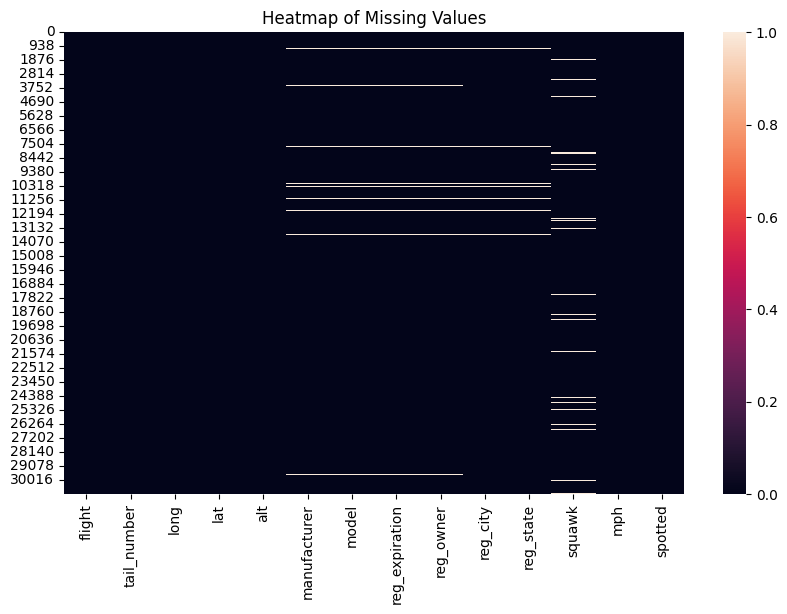

In [713]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull())
plt.title('Heatmap of Missing Values')
plt.show()


In [714]:
mv = df.isnull().sum()
mp = (mv/len(df))*100
mp = mp.round(2)
data = pd.DataFrame({'Missing Value : ' : mv, 'Missing Percent : ' : mp})
data

,Missing Value :,Missing Percent :
flight,32,0.10
tail_number,0,0.00
long,0,0.00
lat,0,0.00
alt,0,0.00
manufacturer,762,2.46
model,762,2.46
reg_expiration,989,3.20
reg_owner,763,2.47
reg_city,607,1.96


### Extracting the data as per the requirements and its dtypes

In [715]:
df_cat = df[['manufacturer', 'model', 'reg_state']]
df_float = df[['long', 'lat']]
df_int = df[['alt', 'mph']]
df_unwanted_col = df[['reg_owner', 'reg_city', 'squawk', 'spotted', 'reg_expiration', 'flight', 'tail_number']]

### Converting the dtypes

In [716]:
for col in df_cat:
    df[col] = df[col].astype('category')

### Cleaning the data

In [717]:
si = SimpleImputer(strategy='most_frequent')

for col in df_cat:
    df[col] = si.fit_transform(df[[col]]).ravel()

In [718]:
df.drop(columns = df_unwanted_col, inplace = True)

### Exploratory Data Analysis

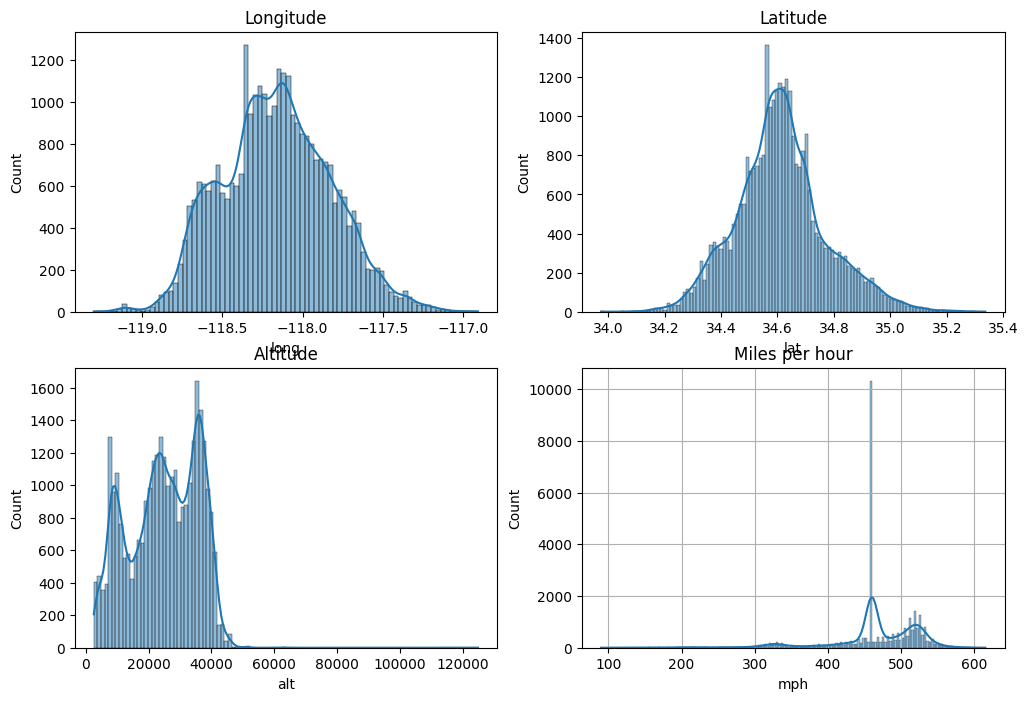

In [719]:
plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['long'], kde = True)
plt.title('Longitude')

plt.subplot(2, 2, 2)
sns.histplot(df['lat'], kde = True)
plt.title('Latitude')

plt.subplot(2, 2, 3)
sns.histplot(df['alt'], kde = True)
plt.title('Altitude')

plt.subplot(2, 2, 4)
sns.histplot(df['mph'], kde = True)
plt.title('Miles per hour')

plt.grid(True)
plt.show()

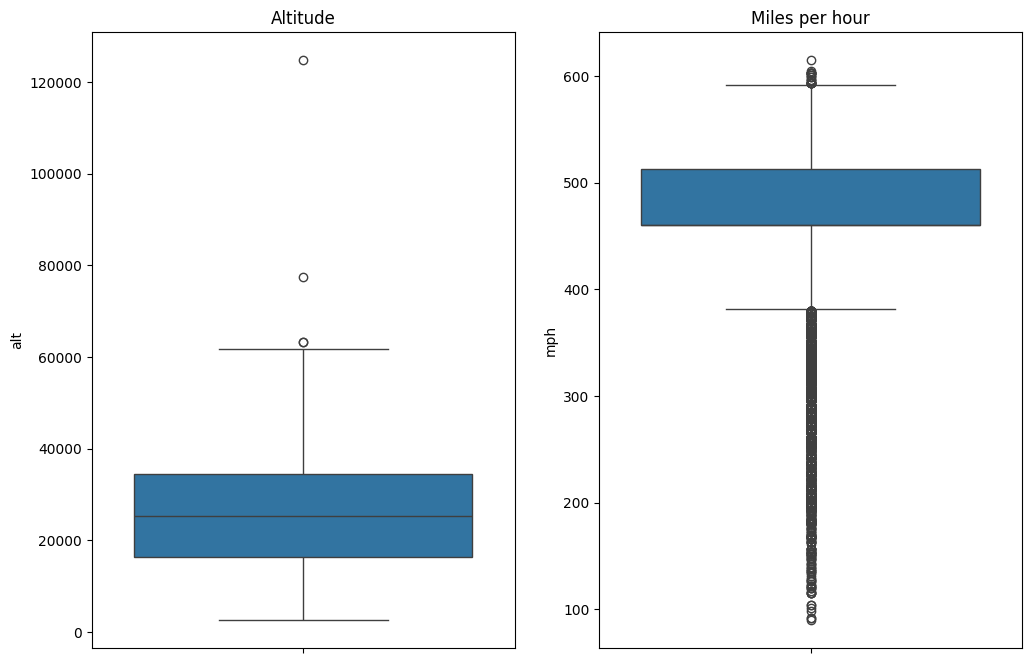

In [720]:
plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
sns.boxplot(df['alt'])
plt.title('Altitude')

plt.subplot(1, 2, 2)
sns.boxplot(df['mph'])
plt.title('Miles per hour')

plt.show()

In [721]:
data = pd.DataFrame({"Longitude description : " : df['long'].describe(), "Latitude description : " : df['lat'].describe(), "Altitude description : " : df['alt'].describe(), "MPH description : " : df['mph'].describe()})
data

,Longitude description :,Latitude description :,Altitude description :,MPH description :
count,30947.000000,30947.000000,30947.000000,30947.000000
mean,-118.162780,34.612216,24676.890329,465.574272
std,0.336949,0.160019,10827.895719,63.122105
min,-119.302000,33.975100,2575.000000,90.000000
25%,-118.392000,34.513200,16325.000000,460.000000
50%,-118.165000,34.605600,25300.000000,460.000000
75%,-117.931000,34.697200,34500.000000,513.000000
max,-116.906000,35.336000,124750.000000,615.000000


### The very low mph values (e.g. around 90 mph) most likely indicate aircraft taxiing on the ground or during initial takeoff roll, rather than cruising in flight.

### Removing the outliers in Altitude

In [722]:
Q1 = df['alt'].quantile(0.25)
Q3 = df['alt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['alt'] >= lower_bound) & (df['alt'] <= upper_bound)]

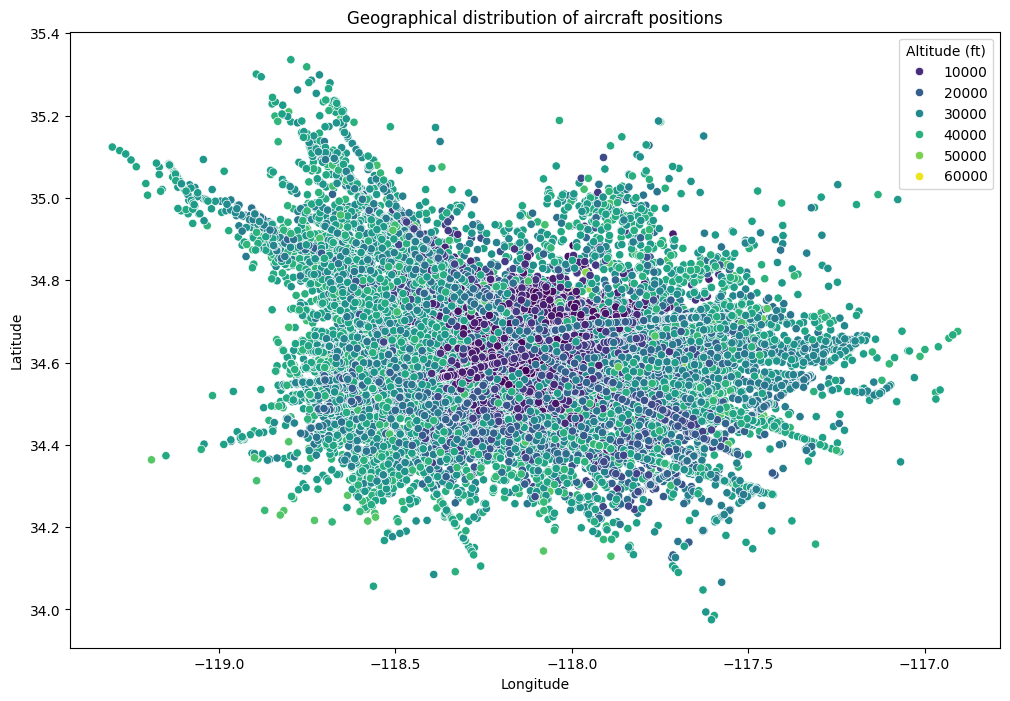

In [723]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='alt', palette='viridis')
plt.title('Geographical distribution of aircraft positions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Altitude (ft)', loc='upper right')
plt.show()

In [724]:
top_states = df['reg_state'].value_counts().nlargest(10).index
df['reg_state_grouped'] = df['reg_state'].apply(lambda x: x if x in top_states else 'Other')

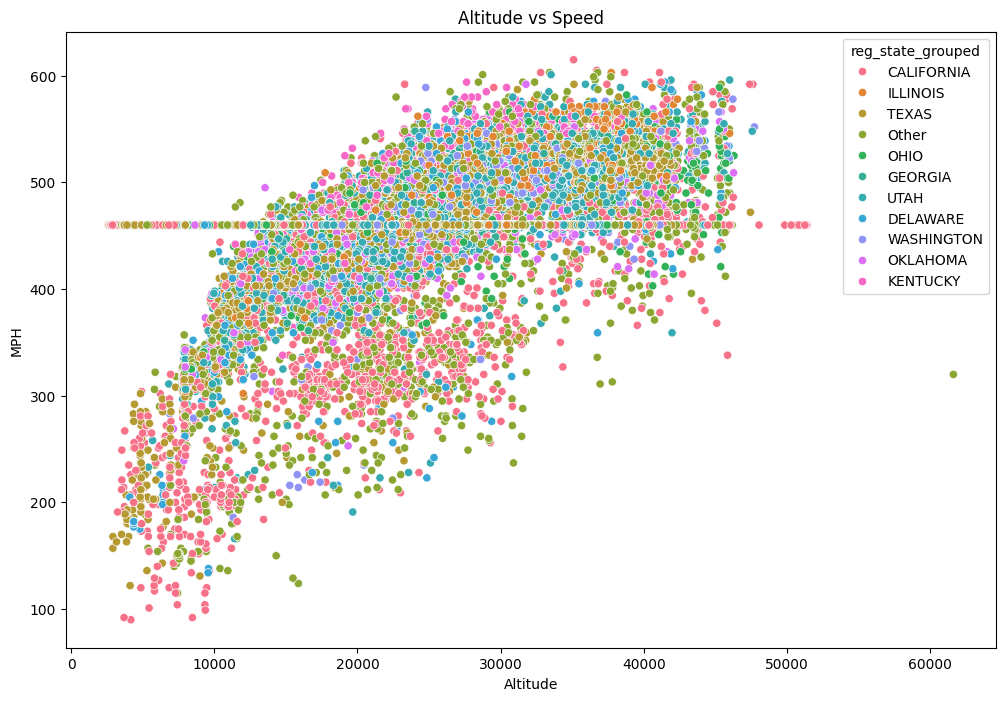

In [725]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='alt', y='mph', data=df, hue = 'reg_state_grouped')
plt.title('Altitude vs Speed')
plt.xlabel('Altitude')
plt.ylabel('MPH')
plt.show()
df.drop(columns = 'reg_state_grouped', inplace = True)

### Correlation analysis

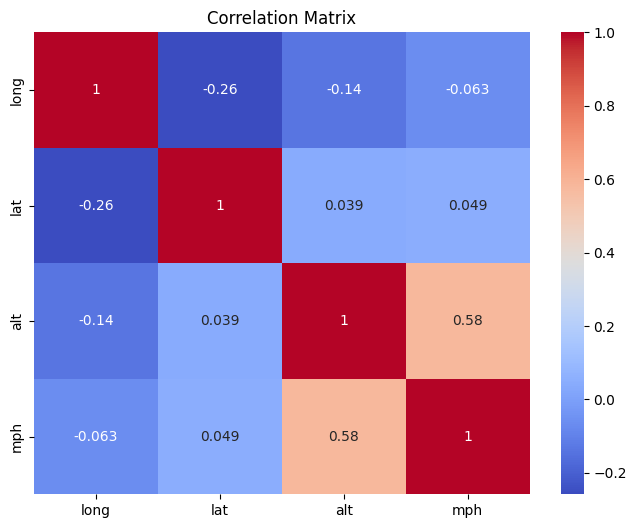

In [726]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [727]:
df[['manufacturer', 'model', 'reg_state']].head()

,manufacturer,model,reg_state
0,BOMBARDIER INC,BD-100-1A10,CALIFORNIA
1,BOEING,737-9,ILLINOIS
2,BOEING,737-7H4,TEXAS
3,AIRBUS INDUSTRIE,A320-232,MASSACHUSETTS
4,DASSAULT,FALCON 2000EX,INDIANA


### One hot encoding 

In [728]:
dummies = pd.get_dummies(df[['manufacturer', 'model', 'reg_state']])
dummies = dummies.astype(int)
merged = pd.concat([df, dummies], axis='columns')
final = merged.drop(['manufacturer', 'model', 'reg_state'], axis='columns')

In [729]:
final.columns

Index(['long', 'lat', 'alt', 'mph', 'manufacturer_ADAMS BALLOON',
       'manufacturer_AERO COMMANDER', 'manufacturer_AERO VODOCHODY',
       'manufacturer_AERONCA', 'manufacturer_AEROSPATIALE',
       'manufacturer_AGUSTA SPA',
       ...
       'reg_state_RHODE ISLAND', 'reg_state_SOUTH CAROLINA',
       'reg_state_SOUTH DAKOTA', 'reg_state_TENNESSEE', 'reg_state_TEXAS',
       'reg_state_UTAH', 'reg_state_VIRGINIA', 'reg_state_WASHINGTON',
       'reg_state_WISCONSIN', 'reg_state_WYOMING'],
      dtype='object', length=977)

### Defining X and Y 

In [730]:
x = final.drop(columns = ['mph'])
y = final['mph']

In [731]:
scaler = StandardScaler()

In [732]:
x = scaler.fit_transform(x)

### Split train and test

In [733]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Build the ANN model

In [734]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

### Compile the model

In [735]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt,
              loss = 'mse',
              metrics = ['mae'])

### Train the model

In [736]:
history = model.fit(x_train, y_train, epochs=75, validation_split=0.2)
history

Epoch 1/75
619/619 [==============================] - 5s 7ms/step - loss: 84611.6875 - mae: 224.0233 - val_loss: 8354.0928 - val_mae: 51.0001
Epoch 2/75
619/619 [==============================] - 4s 6ms/step - loss: 5251.2534 - mae: 41.2471 - val_loss: 5962.5068 - val_mae: 41.5339
Epoch 3/75
619/619 [==============================] - 4s 6ms/step - loss: 4031.0320 - mae: 36.5787 - val_loss: 5434.4419 - val_mae: 39.5888
Epoch 4/75
619/619 [==============================] - 4s 6ms/step - loss: 3646.3347 - mae: 35.0958 - val_loss: 5232.9766 - val_mae: 38.9654
Epoch 5/75
619/619 [==============================] - 4s 6ms/step - loss: 3453.3645 - mae: 34.2228 - val_loss: 5087.3691 - val_mae: 38.1128
Epoch 6/75
619/619 [==============================] - 4s 6ms/step - loss: 3361.8054 - mae: 33.7967 - val_loss: 5044.2520 - val_mae: 38.7521
Epoch 7/75
619/619 [==============================] - 4s 6ms/step - loss: 3304.5671 - mae: 33.5220 - val_loss: 4964.2261 - val_mae: 38.1916
Epoch 8/75
619/619

### Evaluate the model

In [737]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy : {accuracy * 100 :.2f}%")

194/194 [==============================] - 1s 3ms/step - loss: 2682.9465 - mae: 30.5075
Test Accuracy : 3050.75%


In [738]:
y_pred = model.predict(x_test)

194/194 [==============================] - 0s 2ms/step


In [739]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [740]:
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 2682.94580078125
Root Mean Squared Error: 51.79716016135682
Mean Absolute Error: 30.507463455200195
R2 Score: 0.3436654806137085


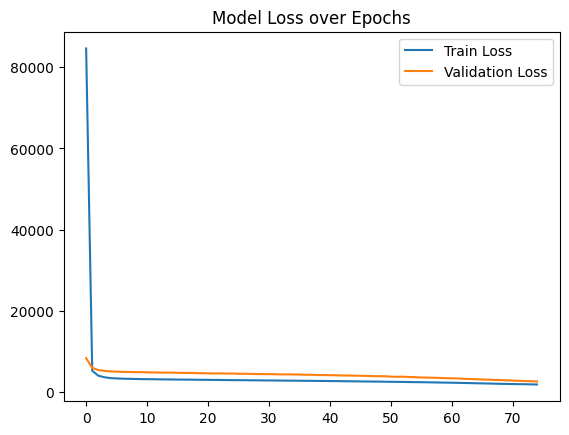

In [741]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss over Epochs')
plt.show()
